<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_07_keras_examples_iris_kfold_callback_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More on Keras
- from "모두의 딥러닝"

# 12. Multinomial classification
- iris data
- one-hot encoding
- softmax
- K-fold cross validation

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
np.random.seed(17)
iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_data.shape

(150, 5)

In [ ]:
dataset = iris_data.values
X = dataset[:,0:4].astype('float')
Y_obj = dataset[:,4]

Y = LabelEncoder().fit_transform(Y_obj)
Y_encoded = utils.to_categorical(Y)   #  one-hot encoding

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [ ]:
# model and compile & train & predict(evaluate)
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100,
                    batch_size=32, verbose=0)
model.save('iris_model.keras')     # or model.save('iris_model_dir')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
from keras.models import load_model
del model   # delete existing models in memory
model = load_model('iris_model.keras')  # newly call the model
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 161ms/step - loss: 0.5388 - accuracy: 0.8333

 Accuracy: 0.8333


In [ ]:
model.evaluate(X_test, Y_test)     # loss, accuracy

1/1 [==============================] - 0s 31ms/step - loss: 0.5388 - accuracy: 0.8333


[0.5388433337211609, 0.8333333134651184]

In [ ]:
X.shape, Y.shape

((150, 4), (150,))

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

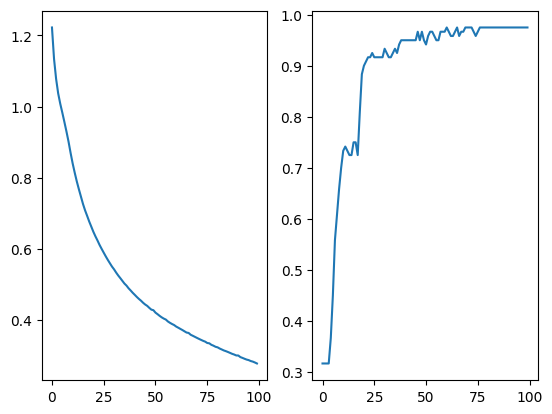

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 46ms/step - loss: 0.3575 - accuracy: 0.9333


[0.35750478506088257, 0.9333333373069763]

In [ ]:
X_test[0]

array([5.4, 3.9, 1.3, 0.4])

In [ ]:
model.predict(X_test)[0]

1/1 [==============================] - 0s 32ms/step


array([9.8314673e-01, 1.6257061e-02, 5.9624226e-04], dtype=float32)

In [ ]:
Y_pred = model.predict(X_test)
tf.math.confusion_matrix(Y_test.argmax(1), Y_pred.argmax(1))

1/1 [==============================] - 0s 21ms/step


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 7,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]], dtype=int32)>

# K-fold cross validation
- Keras does not have a direct equivalent to 'cross_val_score()' from sklearn.

### Manual implement
- full control

In [ ]:
X.shape, Y.shape

((150, 4), (150,))

In [ ]:
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(16,  input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=17)

cvscores = []
for train_index, test_index in skf.split(X, Y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    y_train_enc = utils.to_categorical(y_train)
    y_test_enc = utils.to_categorical(y_test)

    model.fit(X_train, y_train_enc, epochs=30, batch_size=5, verbose=0)
    score = model.evaluate(X_test, y_test_enc, verbose=0)
    cvscores.append(score)

In [ ]:
model.metrics_names, cvscores, np.mean(cvscores, axis=0)

(['loss', 'accuracy'],
 [[0.35759565234184265, 0.9666666388511658],
  [0.22567297518253326, 0.9666666388511658],
  [0.1295793503522873, 1.0],
  [0.1202506572008133, 0.9666666388511658],
  [0.08464252948760986, 0.9666666388511658]],
 array([0.18354823, 0.97333331]))

### Using KerasClassifier wrapper

- We can use scikit-learn in conjunction with Keras to perform K-fold cross-validation.
- easy and seamless integration with familiar interface
- KerasClassifier():
  - it allows you to use a Keras model as an estimator in scikit-learn.
  - This means you can apply scikit-learn's powerful tools for tasks like hyperparameter tuning, cross-validation, and more, while leveraging the capabilities of Keras for deep learning.

In [ ]:
!pip install scikeras

In [ ]:
X.shape, Y_encoded.shape

((150, 4), (150, 3))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple Keras model function
def create_model():
    model = Sequential()
    model.add(Dense(16,  input_shape=(4,), activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Wrap the Keras model
model = KerasClassifier(model=create_model, epochs=30, batch_size=10, verbose=0)

# Define K-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation
results = cross_val_score(model, X, Y_encoded, cv=kfold)

# Print the results
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.7        0.93333333 0.46666667 0.86666667 1.        ]
Accuracy: 79.33% (19.14%)


- which one to choose?
  - it's recommended to validate your choice through experimentation and performance evaluation on your specific dataset and task.

# 14. Callback - check point and early stopping
- Callback 함수: 어떤 event 가 발생했을 때 호출되는 함수

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf

- download wine.csv from https://codedragon.tistory.com/9480
  - class 1: red wine, 0: white wine

In [16]:
df_all = pd.read_csv('wine.csv', header=None)
df = df_all.sample(frac=0.2)  # get only 20% of dataset
df.shape

(1299, 13)

In [17]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5818,7.0,0.44,0.24,12.1,0.056,68.0,210.0,0.99718,3.05,0.5,9.5,5,0


In [18]:
df[12].value_counts()

,count
12,
0,972
1,327


In [19]:
dataset = df.values
X, y = dataset[:,0:12], dataset[:,12]

model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.keras"

# 모델 업데이트 및 저장 (epoch 마다)
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)  # record only when imrpoved

# 테스트 오차가 줄지 않으면 학습 자동 중단 설정 (모니터할 값 저장)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=100) # 좋아지지 않아도 몇 번까지 기다릴것인지

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1: val_loss improved from inf to 2.85905, saving model to ./model/01-2.8591.keras

Epoch 2: val_loss improved from 2.85905 to 1.01413, saving model to ./model/02-1.0141.keras

Epoch 3: val_loss improved from 1.01413 to 0.47306, saving model to ./model/03-0.4731.keras

Epoch 4: val_loss improved from 0.47306 to 0.44701, saving model to ./model/04-0.4470.keras

Epoch 5: val_loss improved from 0.44701 to 0.41295, saving model to ./model/05-0.4130.keras

Epoch 6: val_loss improved from 0.41295 to 0.40251, saving model to ./model/06-0.4025.keras

Epoch 7: val_loss improved from 0.40251 to 0.38891, saving model to ./model/07-0.3889.keras

Epoch 8: val_loss improved from 0.38891 to 0.35742, saving model to ./model/08-0.3574.keras

Epoch 9: val_loss improved from 0.35742 to 0.34445, saving model to ./model/09-0.3445.keras

Epoch 10: val_loss improved from 0.34445 to 0.32055, saving model to ./model/10-0.3206.keras

Epoch 11: val_loss improved from 0.32055 to 0.30411, saving model to ./m

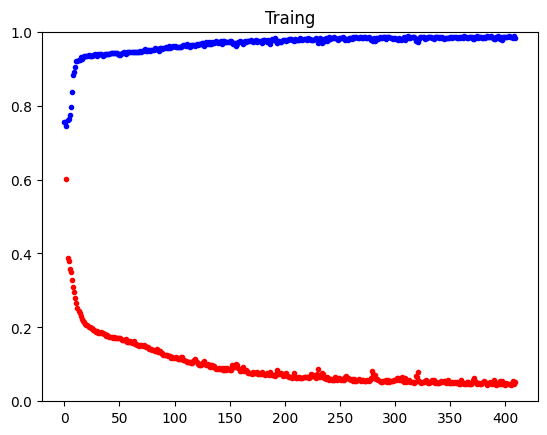

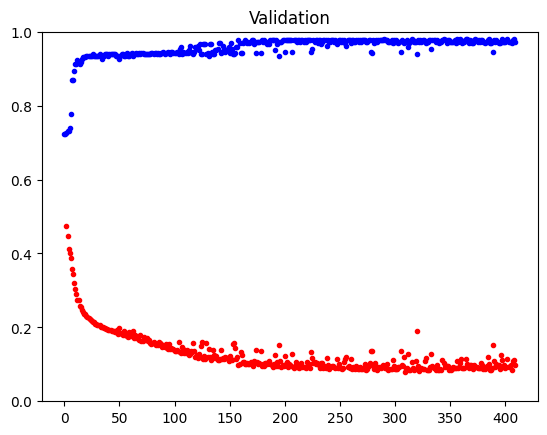

In [20]:
y_loss, y_acc, y_vloss, y_vacc = [], [], [], []

history = model.fit(X, y, validation_split=0.2,
                    epochs=2000, batch_size=100, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
x_len = np.arange(len(y_acc))
plt.ylim(0.,1.)
plt.title("Traing")
plt.plot(x_len, y_loss, "o", c="r", markersize=3)
plt.plot(x_len, y_acc, "o", c="b", markersize=3)
plt.show()
plt.title("Validation")
plt.ylim(0.,1.)
plt.plot(x_len, y_vloss, "o", c="r", markersize=3)
plt.plot(x_len, y_vacc, "o", c="b", markersize=3)
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print("Acuracy: %.4f" %(model.evaluate(X, y)[1]))

41/41 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9815
Acuracy: 0.9815


- 2000 epoch 전에 중간에 중단됨을 알 수 있다.

# Regression - house price
- California area house price estimates

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

In [25]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
X, y = house.data, house.target

In [26]:
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [27]:
X.shape, y.shape

((20640, 8), (20640,))

In [30]:
X.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [31]:
[i for i in dir(house) if not i.startswith("_")]

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [32]:
house.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [33]:
X[:5], y[:5]

(array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
          1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
          3.78800000e+01, -1.22230000e+02],
        [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
          9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
          3.78600000e+01, -1.22220000e+02],
        [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
          1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
          3.78500000e+01, -1.22240000e+02],
        [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
          1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
          3.78500000e+01, -1.22250000e+02],
        [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
          1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
          3.78500000e+01, -1.22250000e+02]]),
 array([4.526, 3.585, 3.521, 3.413, 3.422]))

In [35]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))    # no need of activation function
model.summary()

model.compile(loss='mse',
              optimizer='adam')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           186 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463 (1.81 KB)

 Trainable params: 463 (1.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.5814
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4908
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4154
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3748
Epoch 5/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3770
Epoch 6/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3775
Epoch 7/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3534
Epoch 8/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3531
Epoch 9/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3419
Epoch 10/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3436
Epoch 11/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3267
Epoch 12/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3259
Epoch 13/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3174
Epoch 14/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3205
Epoch 15/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [36]:
history.history.keys()

dict_keys(['loss'])

In [38]:
model.evaluate(X_test, y_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2881


0.31191593408584595

In [37]:
model.predict(X_test)[:5], model.predict(X_test)[:5].flatten()

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([[1.6075788],
        [0.9757793],
        [1.3501902],
        [0.5377337],
        [1.8449218]], dtype=float32),
 array([1.6075788, 0.9757793, 1.3501902, 0.5377337, 1.8449218],
       dtype=float32))

In [ ]:
# just for checking
model.predict(X_test)[:5][:,0] == model.predict(X_test)[:5].flatten()

5/5 [==============================] - 0s 2ms/step


array([ True,  True,  True,  True,  True])

In [39]:
# 예측 값과 실제 값의 비교
y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction = y_pred[i]
    print("real price: {:.3f}, predicted price: {:.3f}".format(label, prediction))

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
real price: 1.410, predicted price: 1.608
real price: 0.650, predicted price: 0.976
real price: 1.158, predicted price: 1.350
real price: 0.612, predicted price: 0.538
real price: 1.806, predicted price: 1.845
real price: 1.938, predicted price: 1.795
real price: 3.720, predicted price: 4.615
real price: 1.185, predicted price: 1.185
real price: 1.048, predicted price: 0.867
real price: 0.881, predicted price: 1.110


In [40]:
model.evaluate(X_test, y_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2881


0.31191593408584595

In [43]:
y_pred = model.predict(X_test).flatten()
print(r2_score(y_test, y_pred))
print(tf.reduce_mean(tf.square(y_test - y_pred)).numpy())

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.7700462382299434
0.31191594363769304


In [44]:
y_test.shape, model.predict(X_test).shape

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


((6192,), (6192, 1))

# Exercise (연습)
- tf.function:
  - 내부에서 tf 1.x 처럼 graph 와 execution 이 분리되어 실행됨.
  - 그래프에 작은 연산이 많을 때 eager execution 모드 보다 빠르다고 알려져 있지만 (합성곱처럼) 계산량이 많은 연산 몇 개로 이루어진 그래프는 속도 향상이 없어 보임.
  - 디버깅이 어려워 모든 함수 동작이 확인된 후 붙이는 게 좋음.

In [ ]:
# tf.function: Compiles a function into a callable TensorFlow graph.
#               (must be faster), but not always...?
import timeit
@tf.function
def dense_layer1(x, w, b):
    return tf.add(tf.matmul(x, w), b)

%time dense_layer1(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))

CPU times: user 42.8 ms, sys: 1.91 ms, total: 44.7 ms
Wall time: 45.3 ms


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [ ]:
def dense_layer2(x, w, b):
    return tf.add(tf.matmul(x, w), b)

%time dense_layer2(tf.ones([3, 2]), tf.ones([2, 2]), tf.ones([2]))

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.51 ms


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [ ]:
import timeit
conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image = tf.zeros([1, 200, 200, 100])
# 워밍 업
conv_layer(image); conv_fn(image)
print("Eager execution convolution:", timeit.timeit(lambda: conv_layer(image), number=10))
print("tf.function convolution:", timeit.timeit(lambda: conv_fn(image), number=10))
print("no difference between these two to execute convolution !")

Eager execution convolution: 0.013682682999842655
tf.function convolution: 0.01231922199986002
no difference between these two to execute convolution !
